In [94]:
%pylab inline

import torch

from PIL import Image
from torch.utils.data import DataLoader
from torchvision import transforms

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['flip']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Data

In [2]:
import tempfile
from torchvision.datasets import CIFAR10

cifar10 = CIFAR10(tempfile.gettempdir(),
                  train=True,
                  download=True)

Files already downloaded and verified


# Image Augmentation

## Random Horizontal Flip

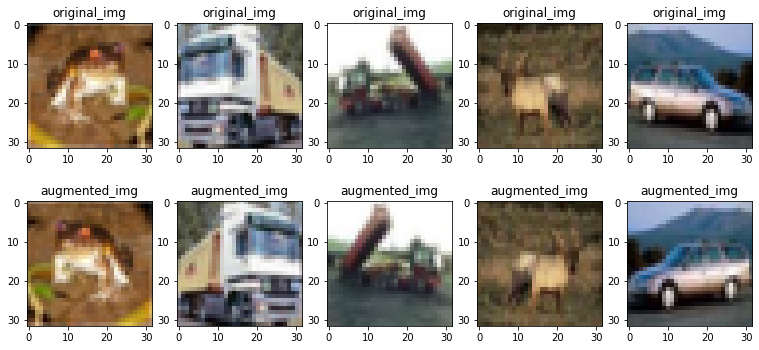

In [3]:
def display_augmented_images(aug_f):
    fig, subplots = plt.subplots(2, 5, figsize=(13, 6))
    for i in range(5):
        axi1 = subplots.flat[i]
        axi2 = subplots.flat[i+5]

        original_img = Image.fromarray(cifar10.data[i])
        augmented_img = aug_f(original_img)

        axi1.imshow(original_img)
        axi2.imshow(augmented_img)
        axi1.set_title('original_img')
        axi2.set_title('augmented_img')

flip = transforms.RandomHorizontalFlip(p=1)
display_augmented_images(flip)

## Random Vertical Flip

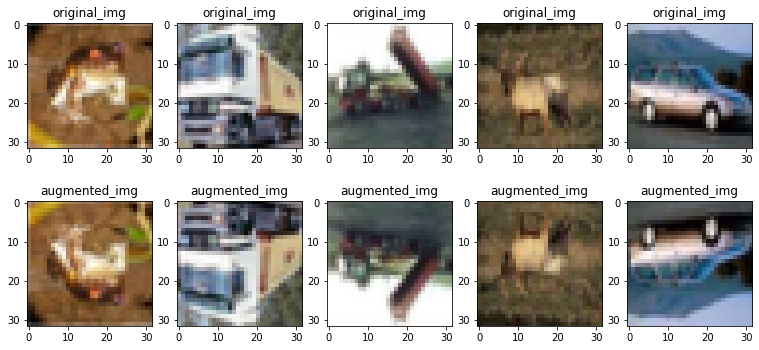

In [4]:
aug_f = transforms.RandomVerticalFlip(p=1)
display_augmented_images(aug_f)

## Random Affine

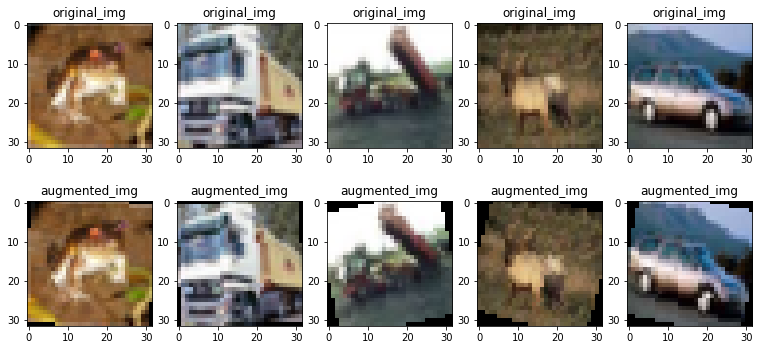

In [5]:
aug_f = transforms.RandomAffine(30)
display_augmented_images(aug_f)

## Random Crop

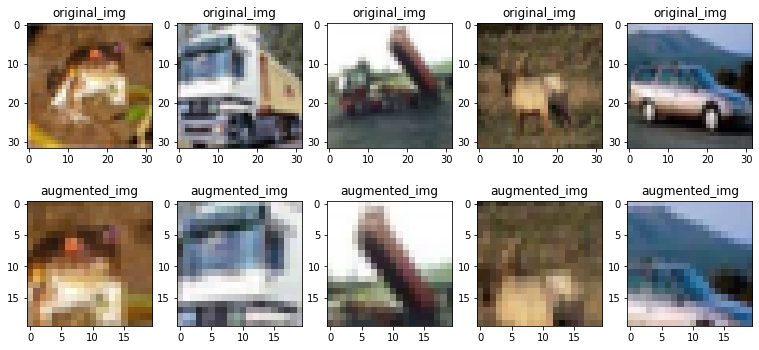

In [6]:
aug_f = transforms.RandomCrop((20, 20))
display_augmented_images(aug_f)

## Random Resized Crop

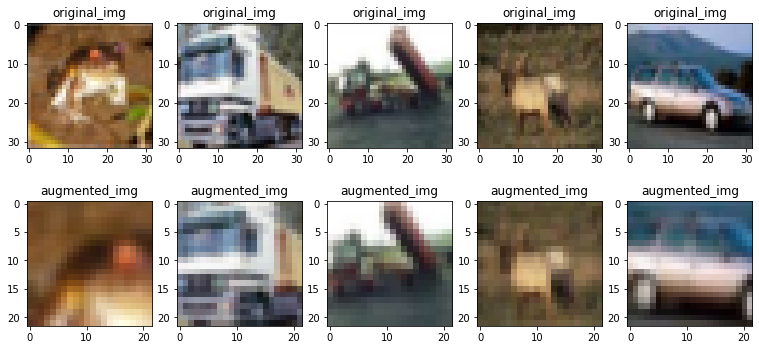

In [15]:
aug_f = transforms.RandomResizedCrop((22, 22))
display_augmented_images(aug_f)

## Random Gray Scale

약하게 gray scale 되거나 그런게 아니라.. color 또는 gray 둘로 나뉜다

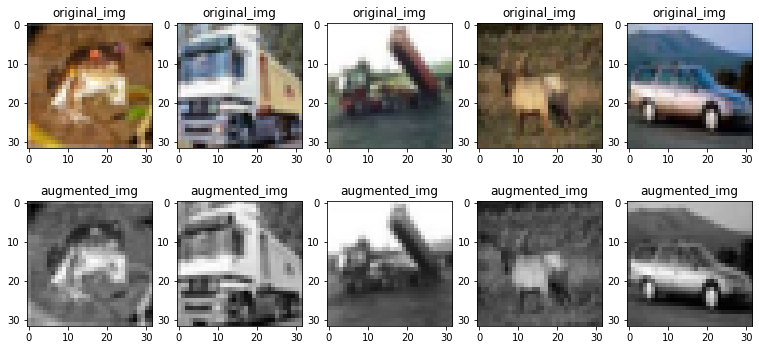

In [10]:
aug_f = transforms.RandomGrayscale(p=1)
display_augmented_images(aug_f)

## Random Perspective

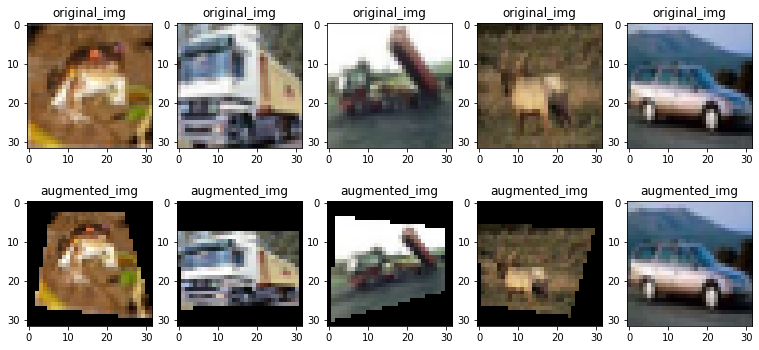

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_gtk3.py:197: Warning: Source ID 31 was not found when attempting to remove it
  GLib.source_remove(self._idle_draw_id)


In [31]:
aug_f = transforms.RandomPerspective()
display_augmented_images(aug_f)

## Random Rotation

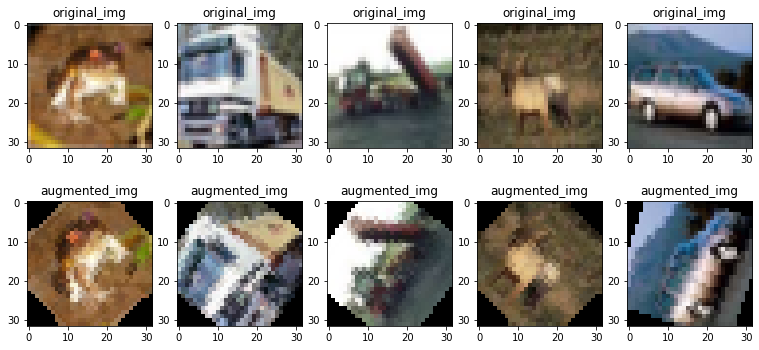

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_gtk3.py:197: Warning: Source ID 15 was not found when attempting to remove it
  GLib.source_remove(self._idle_draw_id)


In [23]:
aug_f = transforms.RandomRotation(90, expand=False)
display_augmented_images(aug_f)

## Random Rotation (expand=True)

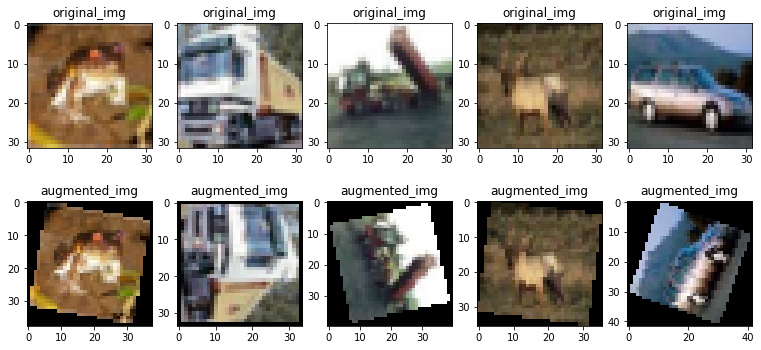

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_gtk3.py:197: Warning: Source ID 17 was not found when attempting to remove it
  GLib.source_remove(self._idle_draw_id)


In [24]:
aug_f = transforms.RandomRotation(90, expand=True)
display_augmented_images(aug_f)

## Random Choice

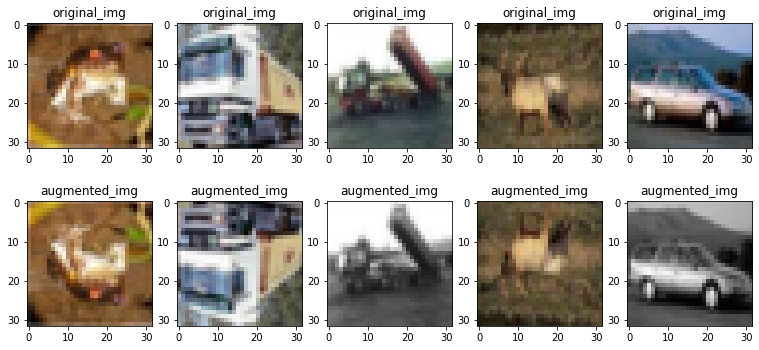

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_gtk3.py:197: Warning: Source ID 23 was not found when attempting to remove it
  GLib.source_remove(self._idle_draw_id)


In [27]:
aug_f = transforms.RandomChoice([transforms.RandomGrayscale(p=1), 
                                 transforms.RandomVerticalFlip(p=1)])
display_augmented_images(aug_f)

## Color Jitter (brightness)

램덤하게 brightness를 설정한다<br>
float 값으로 줄수도 있지만 tuple로 (min, max)값을 설정할수도 있다

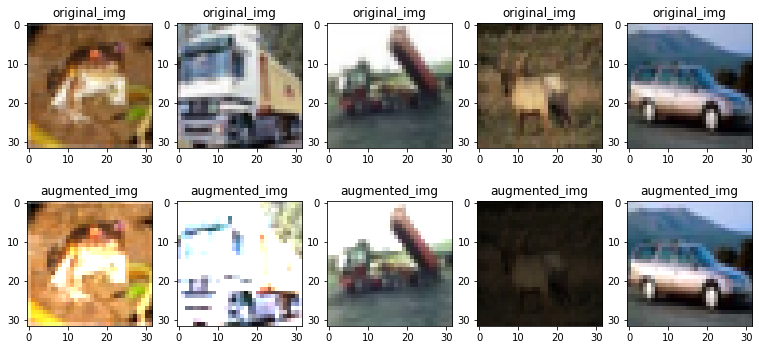

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_gtk3.py:197: Warning: Source ID 81 was not found when attempting to remove it
  GLib.source_remove(self._idle_draw_id)


In [57]:
aug_f = transforms.ColorJitter(brightness=(0.2, 3))
display_augmented_images(aug_f)

## Color Jitter (contrast)

램덤하게 contrast를 설정한다<br>
float 값으로 줄수도 있지만 tuple로 (min, max)값을 설정할수도 있다

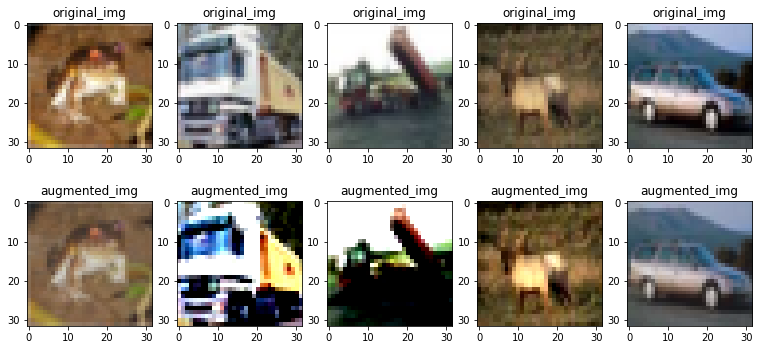

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_gtk3.py:197: Warning: Source ID 89 was not found when attempting to remove it
  GLib.source_remove(self._idle_draw_id)


In [62]:
aug_f = transforms.ColorJitter(contrast=(0.2, 3))
display_augmented_images(aug_f)

## Color Jitter (saturation)

램덤하게 saturation을 설정한다<br>
float 값으로 줄수도 있지만 tuple로 (min, max)값을 설정할수도 있다

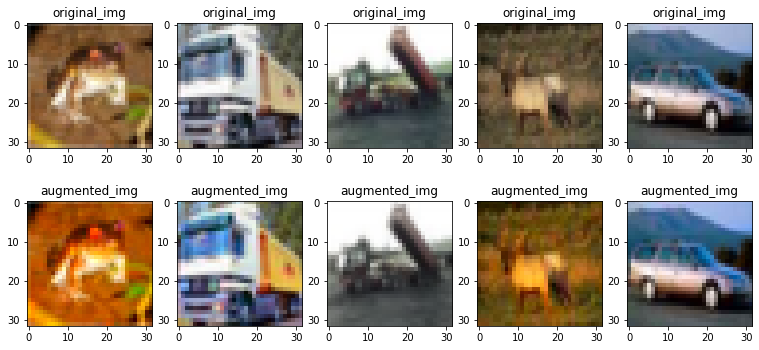

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_gtk3.py:197: Warning: Source ID 109 was not found when attempting to remove it
  GLib.source_remove(self._idle_draw_id)


In [73]:
aug_f = transforms.ColorJitter(saturation=(0.2, 3))
display_augmented_images(aug_f)

## Color Jitter (hue)

램덤하게 hue을 설정한다<br>
float 값으로 줄수도 있지만 tuple로 (min, max)값을 설정할수도 있다

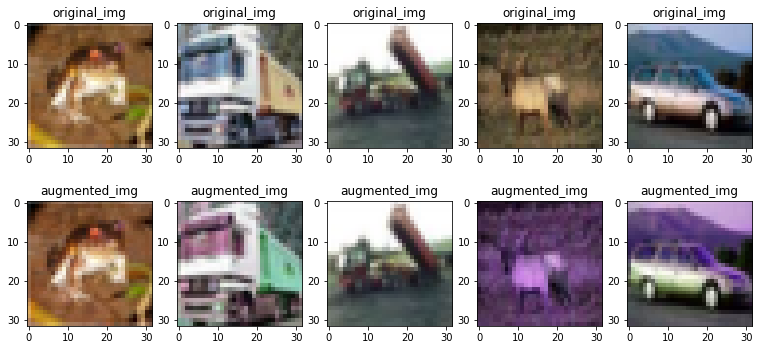

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_gtk3.py:197: Warning: Source ID 115 was not found when attempting to remove it
  GLib.source_remove(self._idle_draw_id)


In [77]:
aug_f = transforms.ColorJitter(hue=(-0.5, 0.5))
display_augmented_images(aug_f)

## Resize


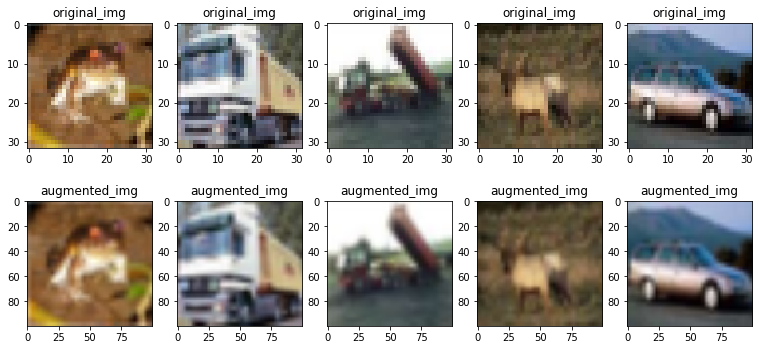

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_gtk3.py:197: Warning: Source ID 119 was not found when attempting to remove it
  GLib.source_remove(self._idle_draw_id)


In [79]:
aug_f = transforms.Resize((100, 100))
display_augmented_images(aug_f)

## Normalization

$$ \text{normalization} = \frac{(\text{image} - \mu)}{\sigma} $$ 

In [131]:
_mean = cifar10.data.mean(axis=(0, 1, 2)) / 255
_std = cifar10.data.std(axis=(0, 1, 2)) / 255

print('shape   :', cifar10.data[0].shape)
print('RGB mean:', _mean)
print('RGB std :', _std)

aug_f = transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize(_mean, _std)])
img = aug_f(cifar10.data[0])

print('augmented img shape:', img.shape)
print('augmented img mean :', img.mean(axis=(1, 2)))
print('augmented img std  :', img.std(axis=(1, 2)))

shape   : (32, 32, 3)
RGB mean: [0.49139968 0.48215841 0.44653091]
RGB std : [0.24703223 0.24348513 0.26158784]
augmented img shape: torch.Size([3, 32, 32])
augmented img mean : tensor([ 0.2524, -0.2875, -0.7470])
augmented img std  : tensor([0.6458, 0.6837, 0.6127])


## ToTensor

ToTensor를 하면 channel의 위치가 바뀝니다.<br>

- (h, w, c) -> (c, h, w)

In [139]:
img = cifar10.data[0]
aug_f = transforms.ToTensor()

print('image shape          :', img.shape)
print('augmented image shape:', aug_f(img).shape)

image shape          : (32, 32, 3)
augmented image shape: torch.Size([3, 32, 32])


## Channel Transpose

channel의 위치를 변화시키는 방법은 2가지가 있습니다. 

 - permute: 한번에 여러 dimension의 순서를 변경시킬 수 있습니다.
 - transpose: 한번에 2개의 dimension의 순서를 변경시킵니다.

In [130]:
data = cifar10.data
data = torch.Tensor(data)
print('data shape:', data.shape)
print('permute   :', data.permute(0, 3, 1, 2).shape)
print('transpose :', data.transpose(1, 3).shape)

data shape: torch.Size([50000, 32, 32, 3])
permute   : torch.Size([50000, 3, 32, 32])
transpose : torch.Size([50000, 3, 32, 32])
